<a href="https://colab.research.google.com/github/Bibhuti-MLAI/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [80]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#load the data set from drive
customer=pd.read_excel("/content/drive/MyDrive/Customer Segmentation - Bibhuti Bhusan Sahu/Online Retail.xlsx")

In [83]:
customer.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [84]:
customer.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [85]:
#Getting the shape of dataset with rows and columns
print(customer.shape)

(541909, 8)


In [86]:
#Getting all the columns
print("Features of the dataset:")
customer.columns

Features of the dataset:


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [87]:
#check details about the data set
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [88]:
#Getting the unique values
customer.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [89]:
#Getting the statistical insights of the data
customer.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **Data Preprocessing**

In [90]:
#Looking for nan and null values
customer.isna().sum()
customer.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [91]:
customer.dropna(inplace=True)

In [92]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [93]:
#Checking for duplicate values
value=len(customer[customer.duplicated()])
value

5225

In [94]:
customer=customer.drop_duplicates()

In [95]:
customer.shape

(401604, 8)

# **Droping cancelled orders**

In [96]:
customer['InvoiceNo'] = customer['InvoiceNo'].astype('str')

In [97]:
# checking invoice no.
customer[customer['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [98]:
customer=customer[~customer['InvoiceNo'].str.contains('C')]

In [99]:
customer.shape

(392732, 8)

# **Manupulating date column**

In [100]:
customer['InvoiceDate_year'] = customer['InvoiceDate'].dt.year
customer['InvoiceDate_month'] = customer['InvoiceDate'].dt.month
customer['InvoiceDate_day'] = customer['InvoiceDate'].dt.day
customer['InvoiceDate_hour'] = customer['InvoiceDate'].dt.hour
customer['InvoiceDate_minute'] = customer['InvoiceDate'].dt.minute
customer['InvoiceDate_second'] = customer['InvoiceDate'].dt.second


In [101]:
print("Columns and data types")
pd.DataFrame(customer.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceDate_year,int64
InvoiceDate_month,int64


In [102]:
customer.shape

(392732, 14)

# **Exploratory data analysis**

In [103]:
# let us see the unique ids of customers
print('The no. of customers = ',customer['CustomerID'].nunique())

The no. of customers =  4339


In [104]:
# finding most active customer
active_customers=pd.DataFrame(customer['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)
active_customers

,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677
...,...,...
4334,13099.0,1
4335,17715.0,1
4336,13017.0,1
4337,16073.0,1


In [105]:
# top 5
active_customers.head()

,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


Text(0, 0.5, 'Count')

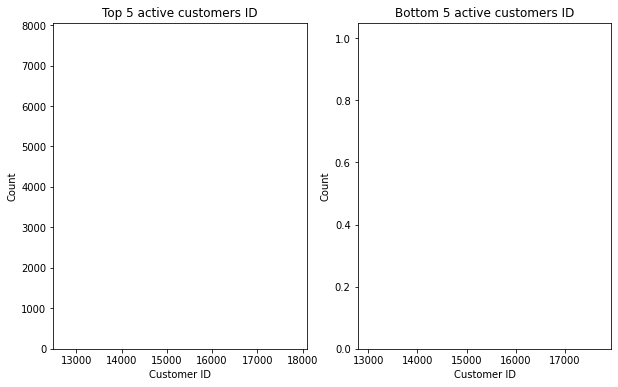

In [106]:
# visulizing
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.bar(active_customers['CustomerID'][-5:],active_customers['Count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

# **Analysis of categorical features**

In [107]:
categorical_columns=list(customer.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [108]:
Description_df=customer['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)

In [109]:
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [110]:
Description_df.tail()

,Description_Name,Count
3872,DIAMANTE NECKLACE,1
3873,VINTAGE BEAD PINK JEWEL STAND,1
3874,PURPLE ENAMEL FLOWER HAIR TIE,1
3875,PAINTED HEART WREATH WITH BELL,1
3876,I LOVE LONDON MINI RUCKSACK,1


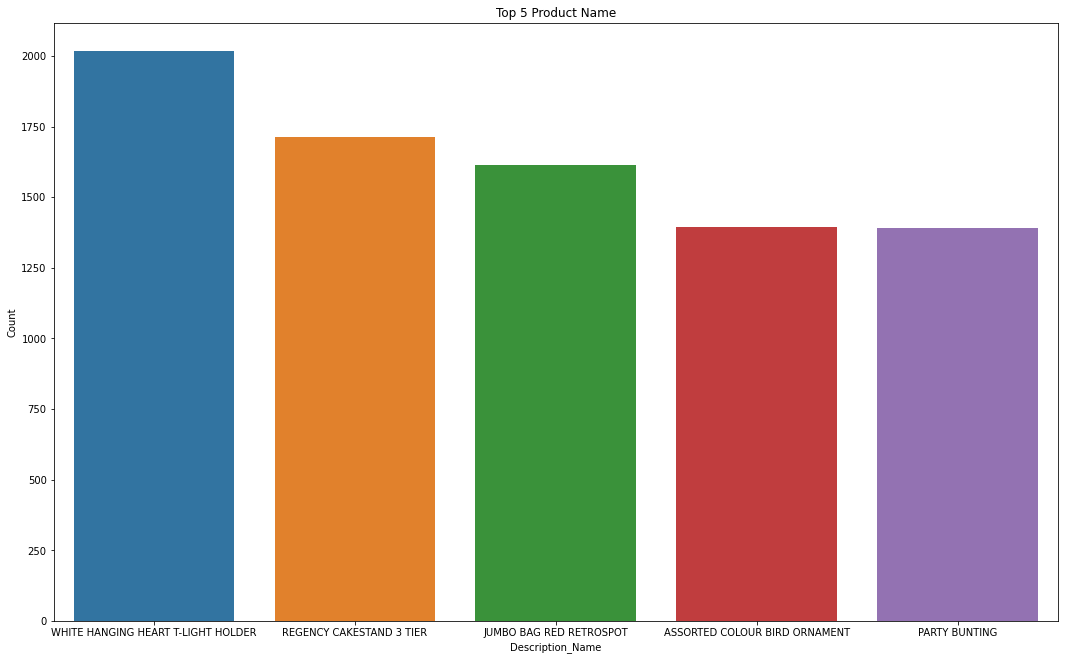

In [111]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

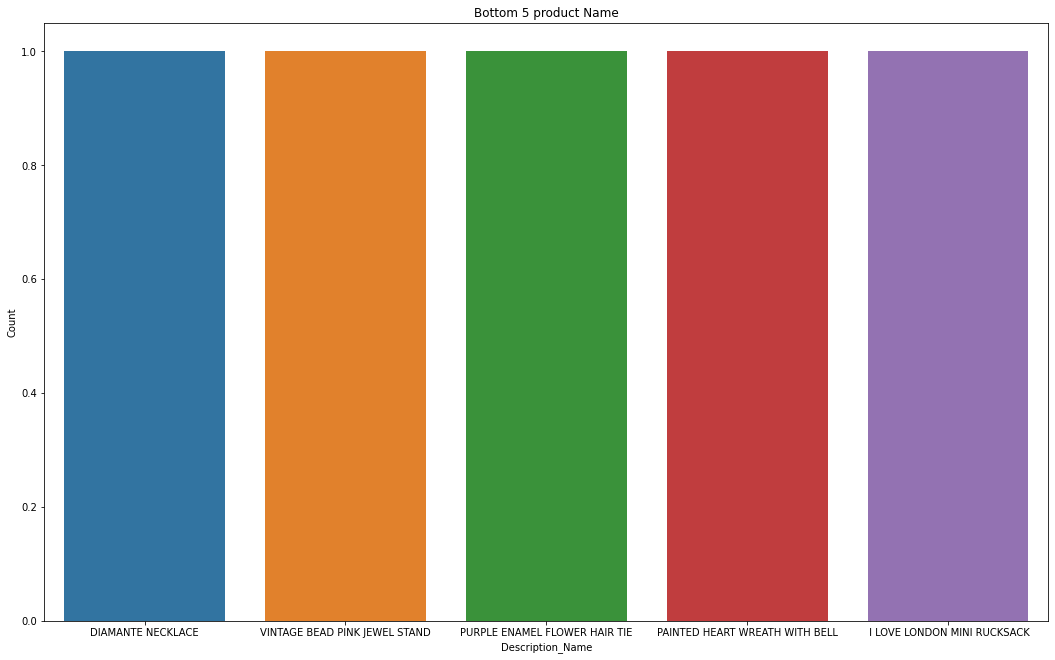

In [112]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

In [113]:
StockCode_df=customer['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)

In [114]:
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


In [115]:
StockCode_df.tail()

,StockCode_Name,Count
3660,72815,1
3661,90197B,1
3662,90141E,1
3663,90190B,1
3664,84854,1


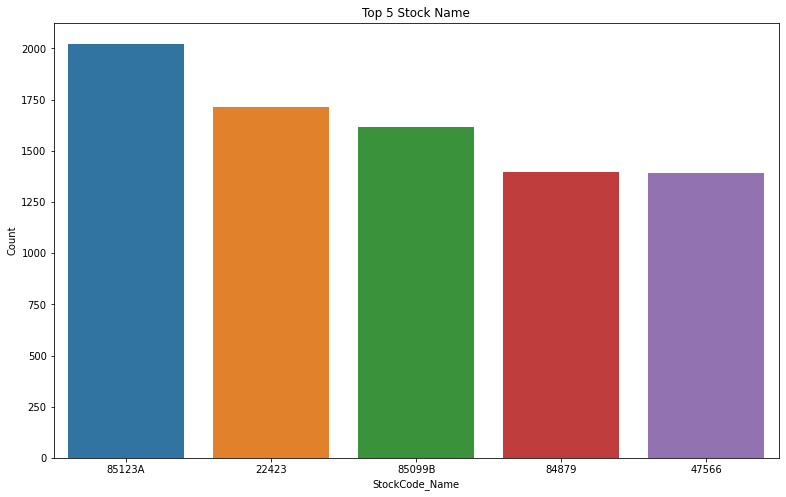

In [116]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

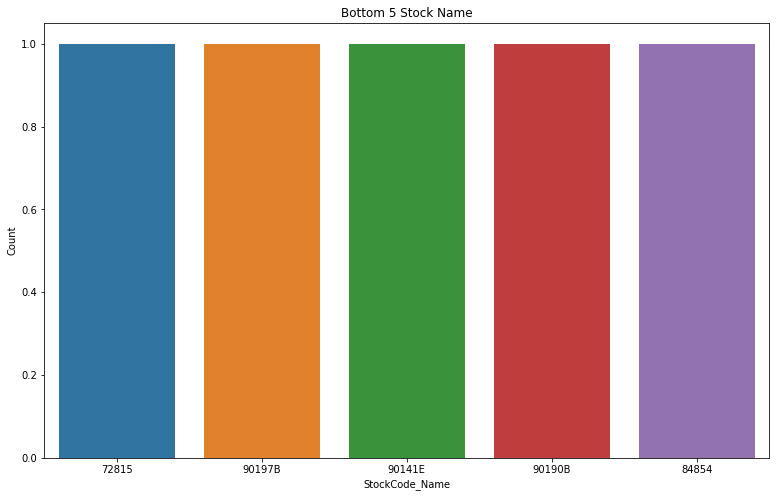

In [117]:
plt.figure(figsize=(13,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])

In [118]:
country_df=customer['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)

In [119]:
country_df.head()

,Country_Name,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


In [120]:
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


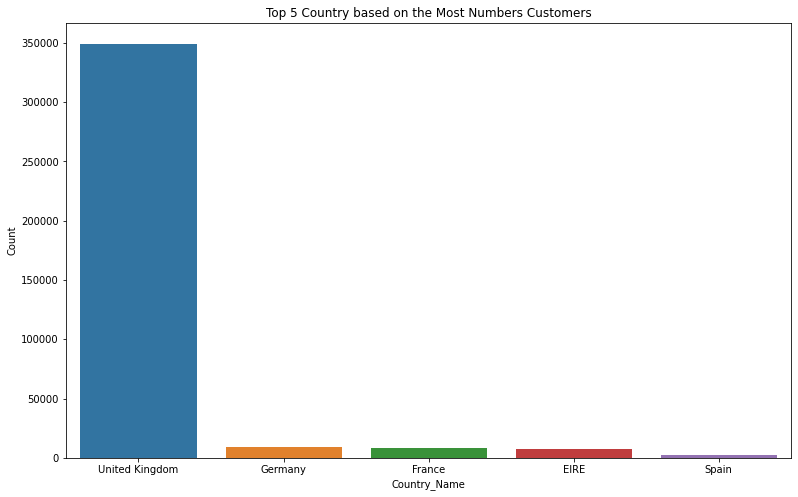

In [121]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

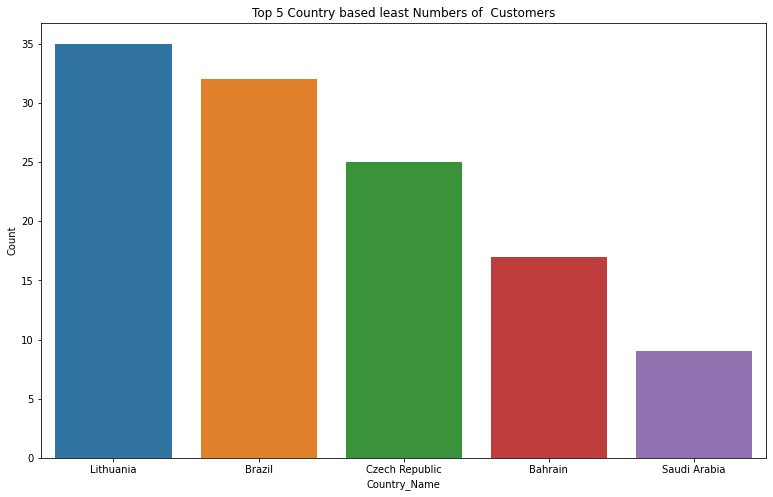

In [122]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

In [123]:
customer[customer['Country']=='United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011,12,9,12,31,0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011,12,9,12,49,0
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011,12,9,12,49,0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011,12,9,12,49,0


In [124]:
customer[customer['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-02-24 10:34:00,0.42,12565.0,Saudi Arabia,2011,2,24,10,34,0
100811,544838,22363,GLASS JAR MARMALADE,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,2011,2,24,10,34,0
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,2011,2,24,10,34,0
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,2011,2,24,10,34,0
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,2011,2,24,10,34,0
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,2011,2,24,10,34,0
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,2011,2,24,10,34,0
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2011-02-24 10:34:00,5.49,12565.0,Saudi Arabia,2011,2,24,10,34,0
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2011-02-24 10:34:00,1.45,12565.0,Saudi Arabia,2011,2,24,10,34,0


# **Analysing numerical features**

In [125]:
numerical_columns=list(customer.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features


Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

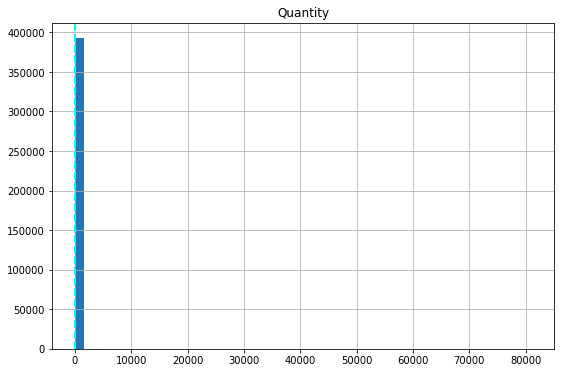

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


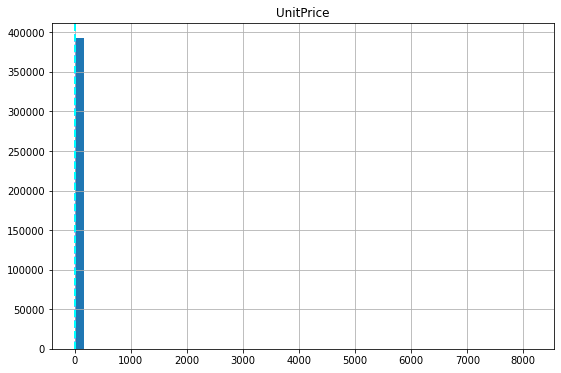

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


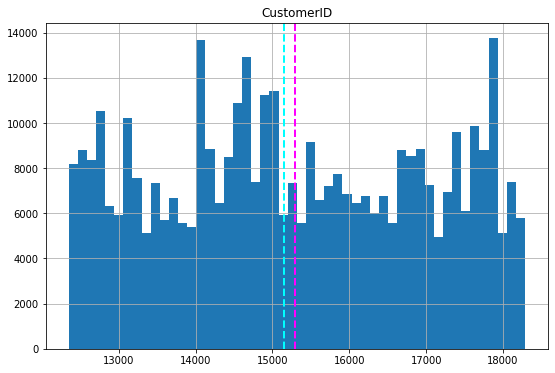

Skewness : 0.0301953601721347
Kurtosis : -1.1807001644923933


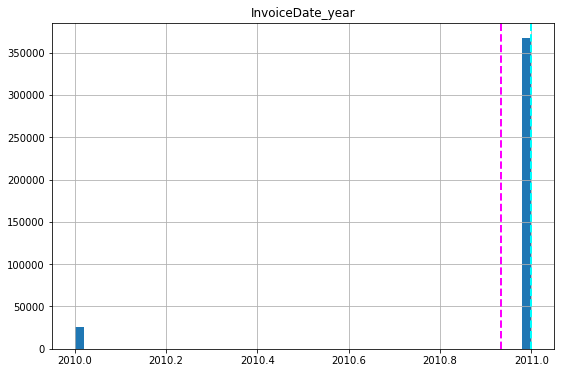

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


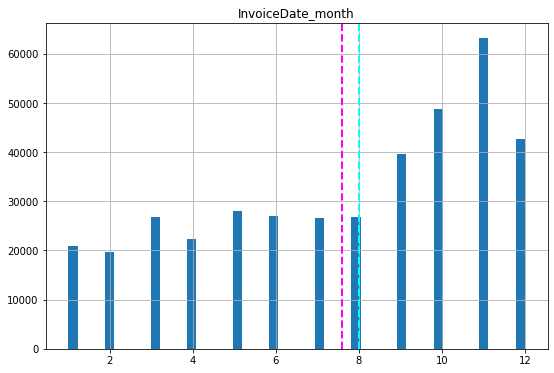

Skewness : -0.44039649840565165
Kurtosis : -1.0764781956797629


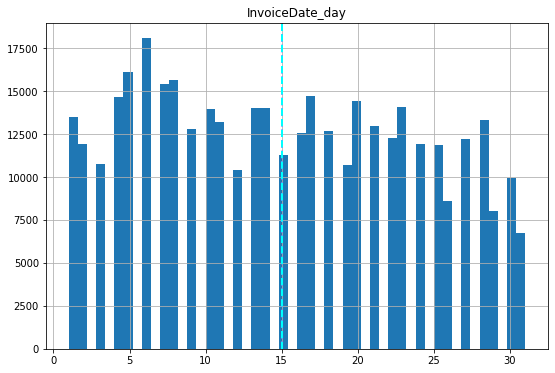

Skewness : 0.11441497180759913
Kurtosis : -1.1716768778411122


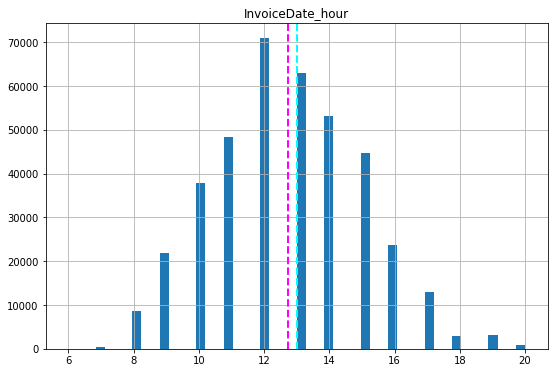

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


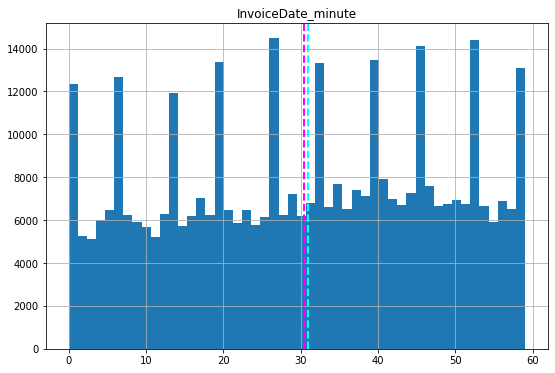

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


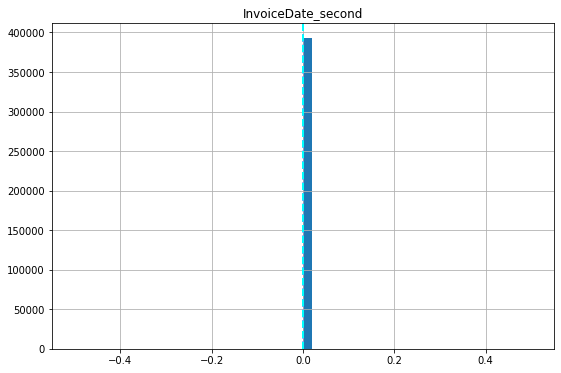

Skewness : 0
Kurtosis : 0


In [126]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer[col].skew())
  print( "Kurtosis :",customer[col].kurt())

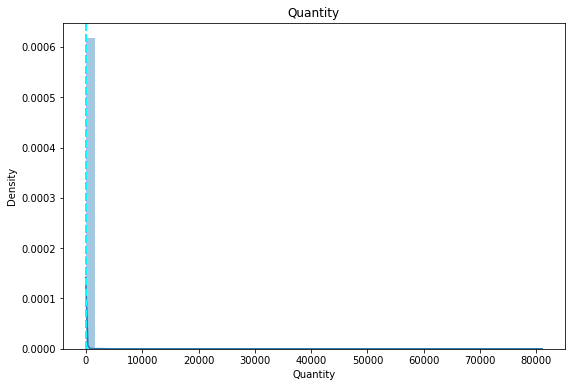

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


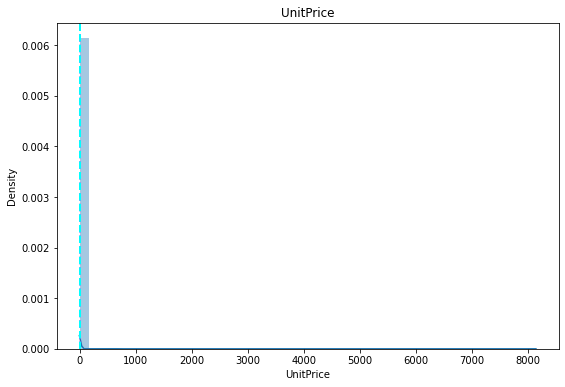

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


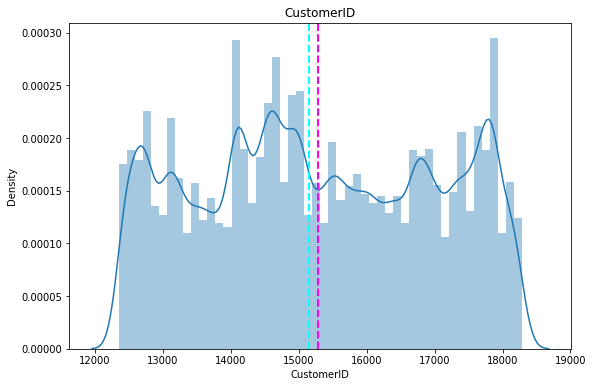

Skewness : 0.0301953601721347
Kurtosis : -1.1807001644923933


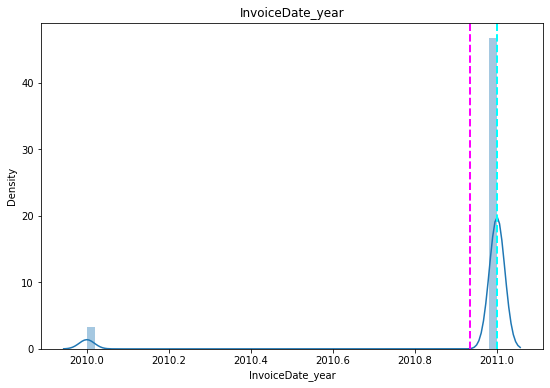

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


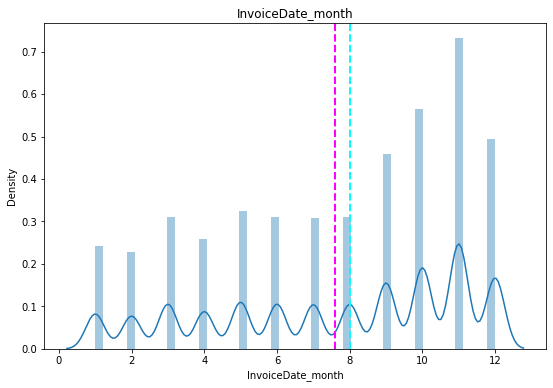

Skewness : -0.44039649840565165
Kurtosis : -1.0764781956797629


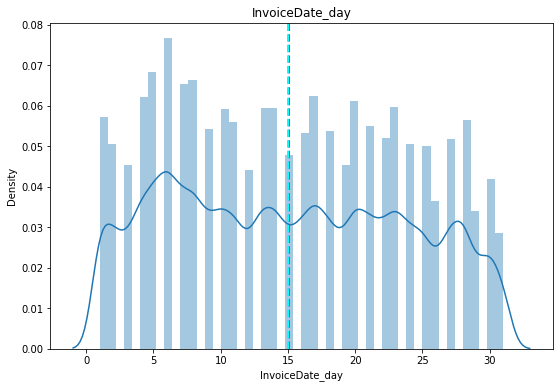

Skewness : 0.11441497180759913
Kurtosis : -1.1716768778411122


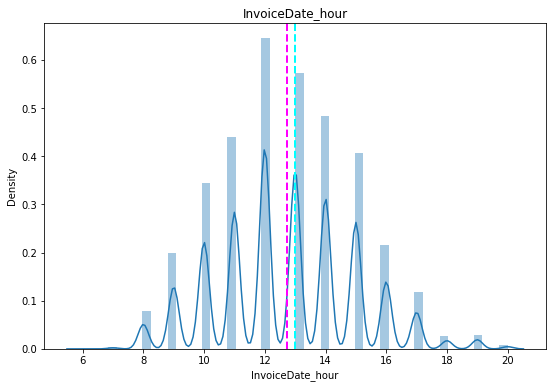

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


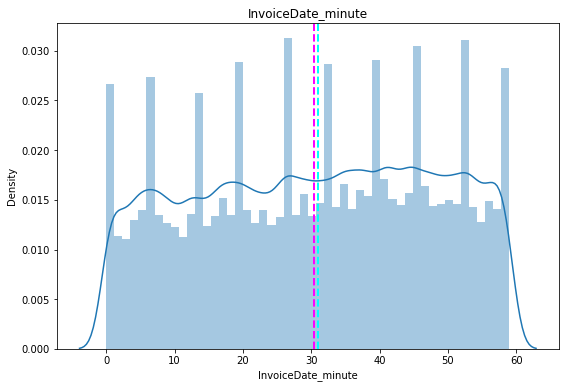

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


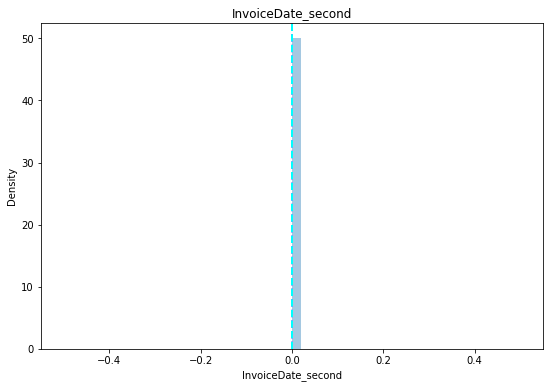

Skewness : 0
Kurtosis : 0


In [127]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer[col])
  sns.distplot(customer[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer[col].skew())
  print( "Kurtosis :",customer[col].kurt())

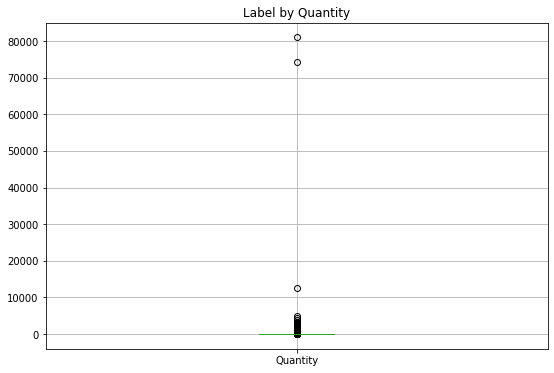

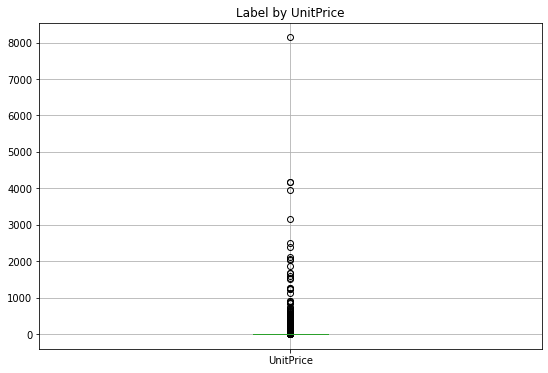

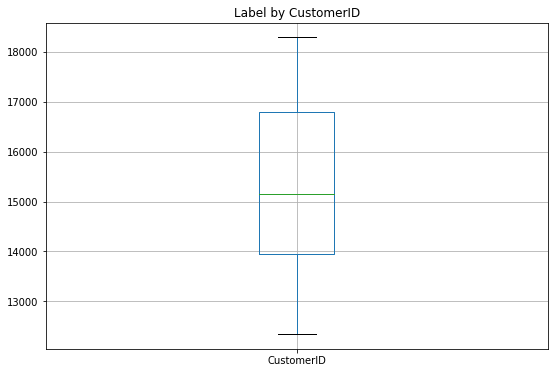

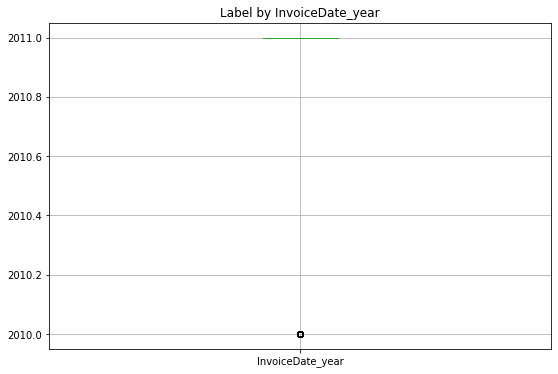

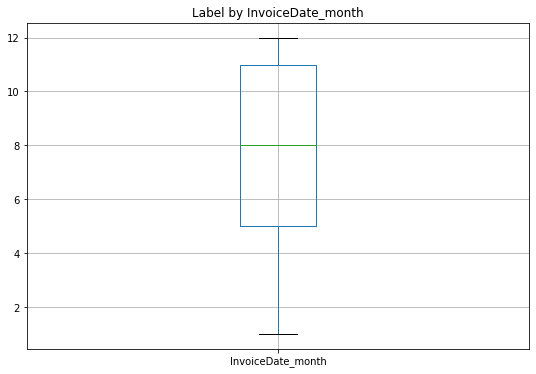

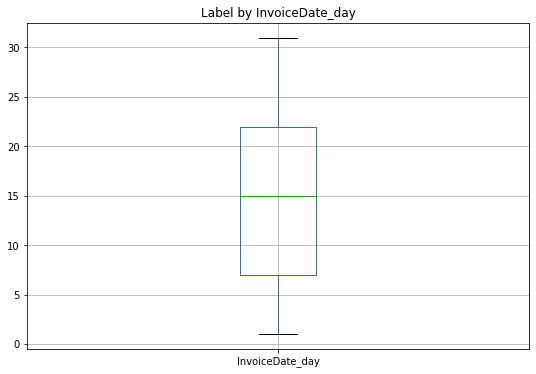

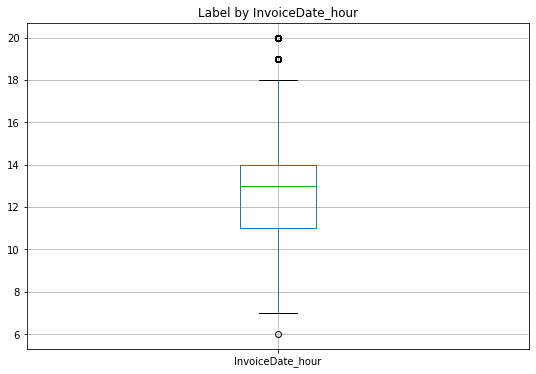

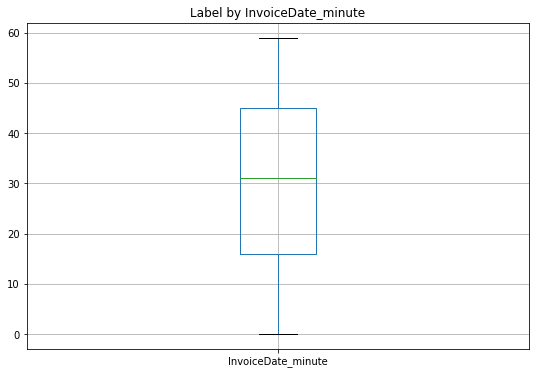

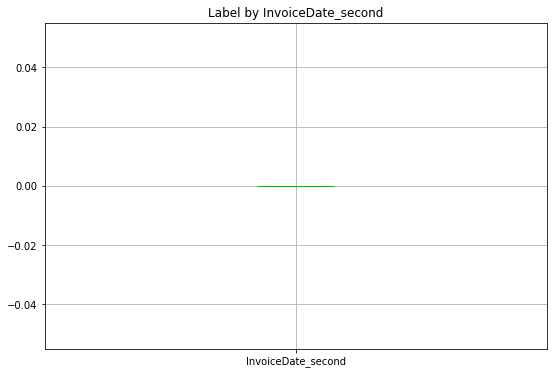

In [128]:
# plot a boxplot for the label by each numerical feature  

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    customer.boxplot(col)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

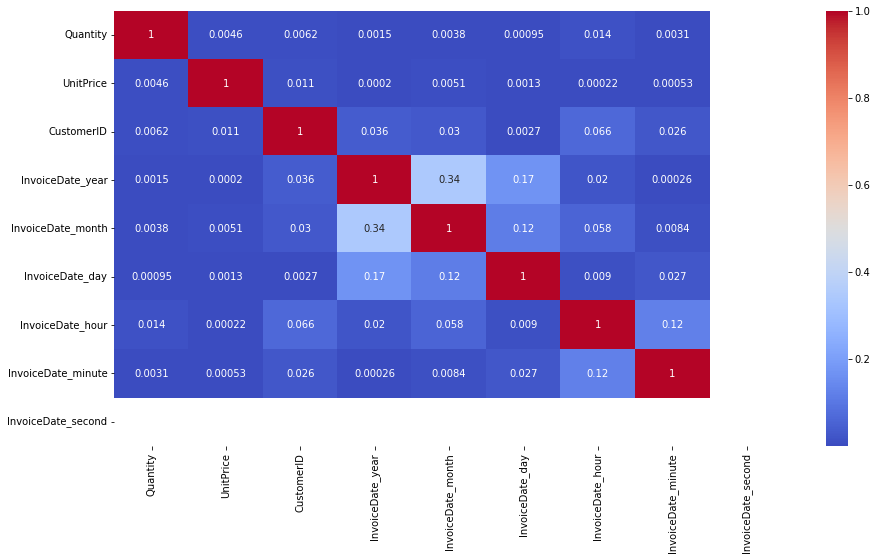

In [129]:
## Correlation
plt.figure(figsize=(15,8))
correlation=customer.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# **Feature engineering**

In [130]:
customer['Day']=customer['InvoiceDate'].dt.day_name()

In [131]:
customer['TotalAmount']=customer['Quantity']*customer['UnitPrice']

In [132]:
customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,20.34


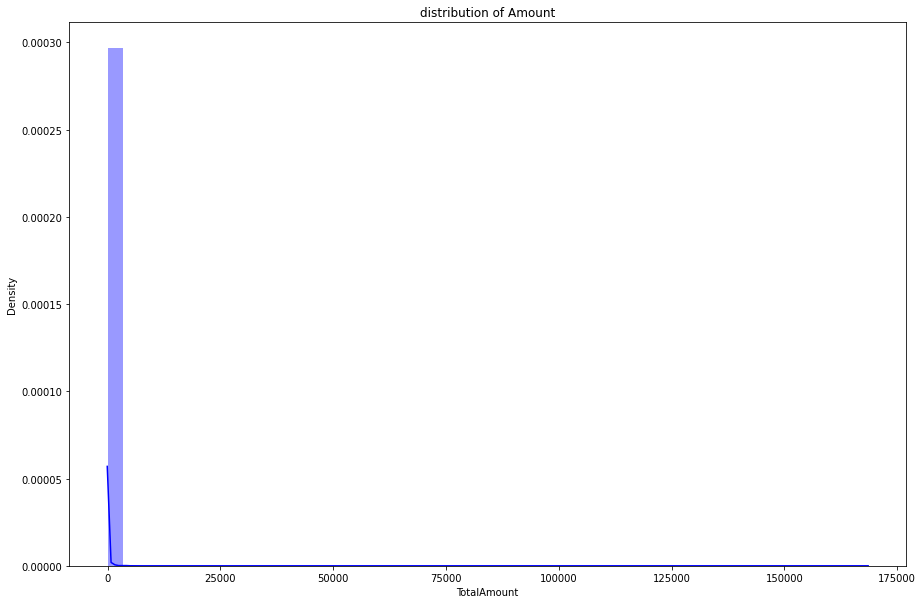

In [133]:
plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(customer['TotalAmount'],color="B")

In [134]:
customer['TotalAmount'].describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

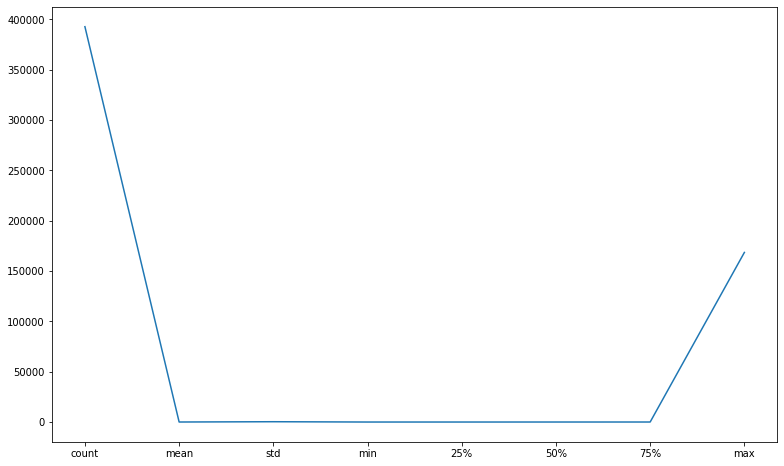

In [135]:
plt.figure(figsize=(13,8))
customer['TotalAmount'].describe().plot()

In [136]:
day_df=customer['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237
4,Sunday,61214
5,Friday,54231


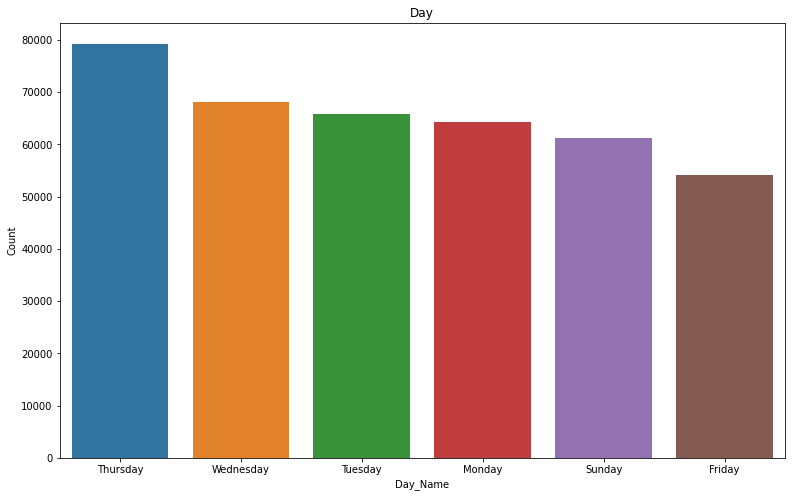

In [137]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

In [138]:
month_df=customer['InvoiceDate_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'InvoiceDate_month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,11,63182
1,10,48796
2,12,42699
3,9,39671
4,5,28075
5,6,26926
6,3,26872
7,8,26796
8,7,26582
9,4,22435


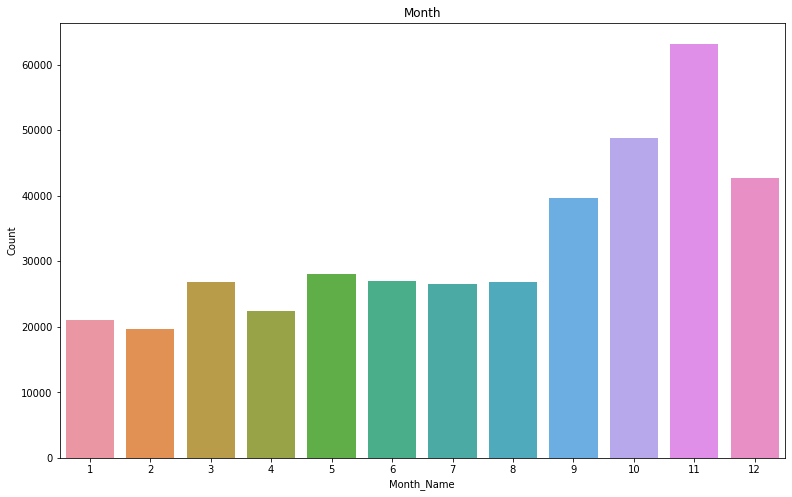

In [139]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

In [140]:
hour_df=customer['InvoiceDate_hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'InvoiceDate_hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,70942
1,13,63024
2,14,53260
3,11,48373
4,15,44793
5,10,37775
6,16,23719
7,9,21928
8,17,12942
9,8,8688


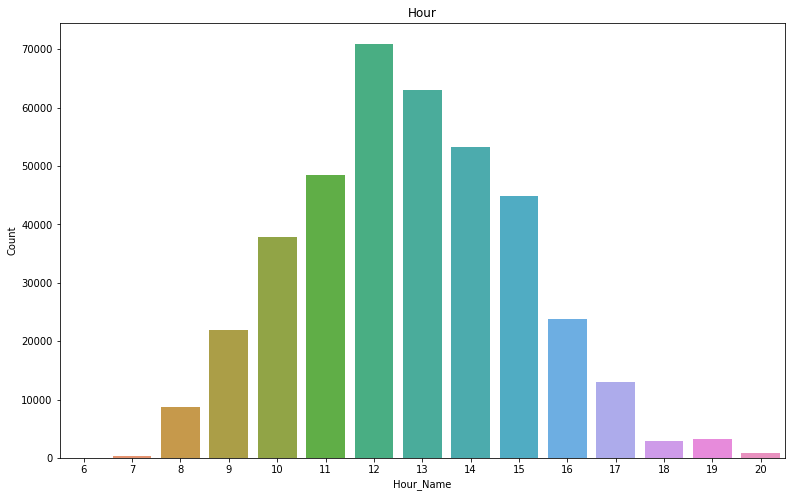

In [141]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

In [142]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [143]:
customer['Time_type']=customer['InvoiceDate_hour'].apply(time_type)

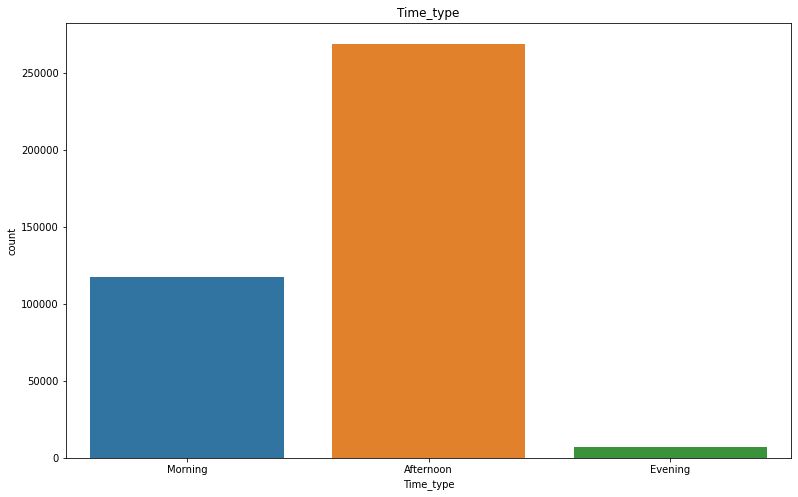

In [144]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=customer)

# **Modelling**

# **Creating RFM model**

In [146]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = customer.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [147]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

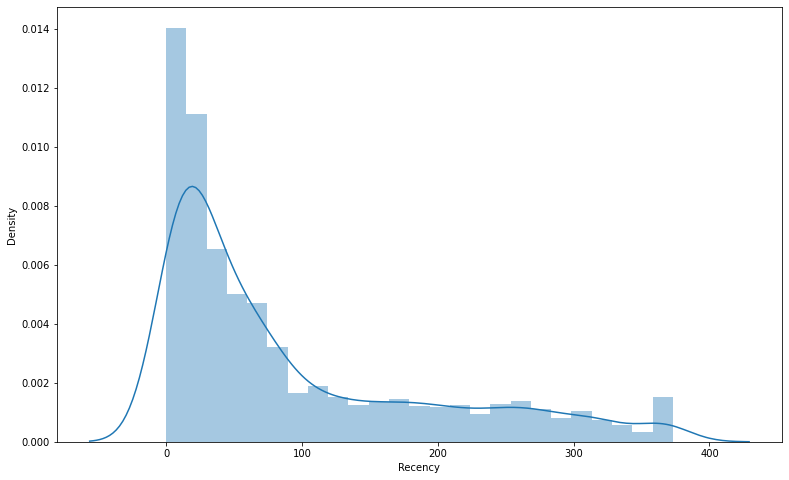

In [148]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

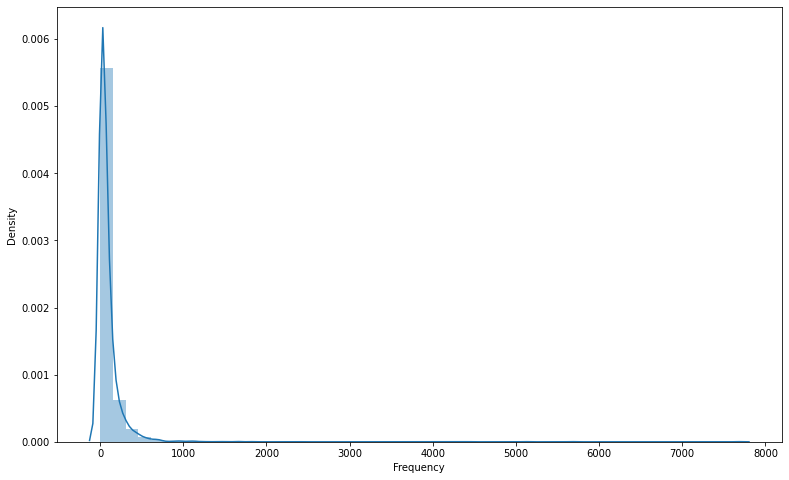

In [149]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [150]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: Monetary, dtype: float64

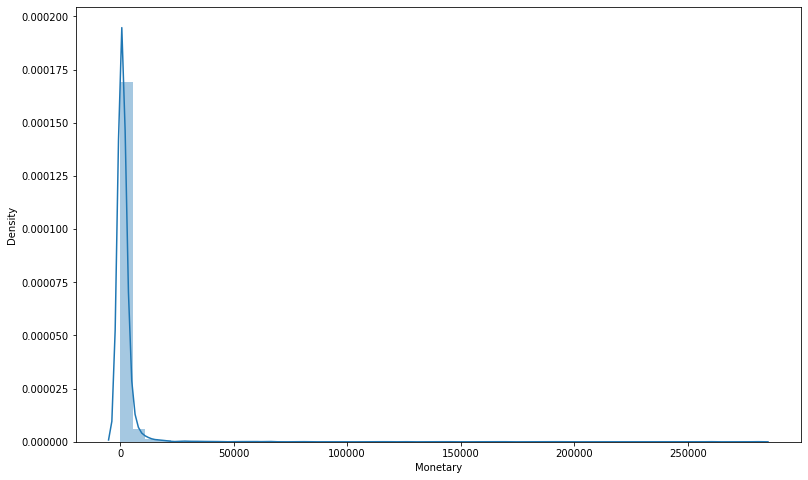

In [151]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [152]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [153]:
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5}}

In [154]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [155]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [156]:

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [157]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

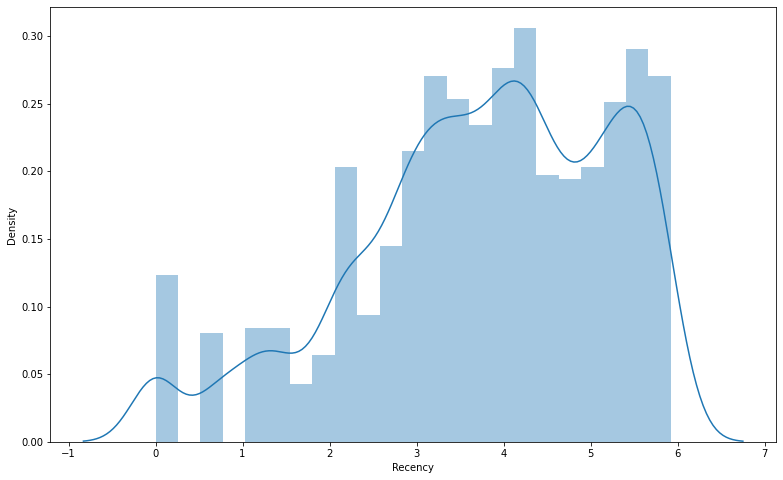

In [158]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

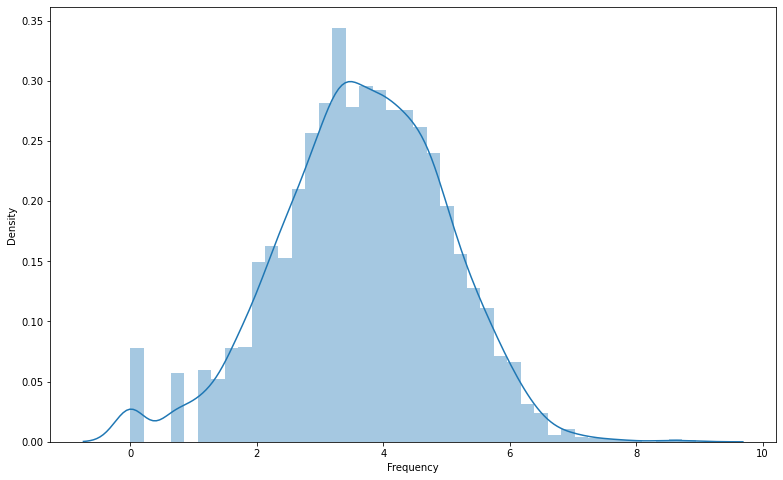

In [159]:

#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

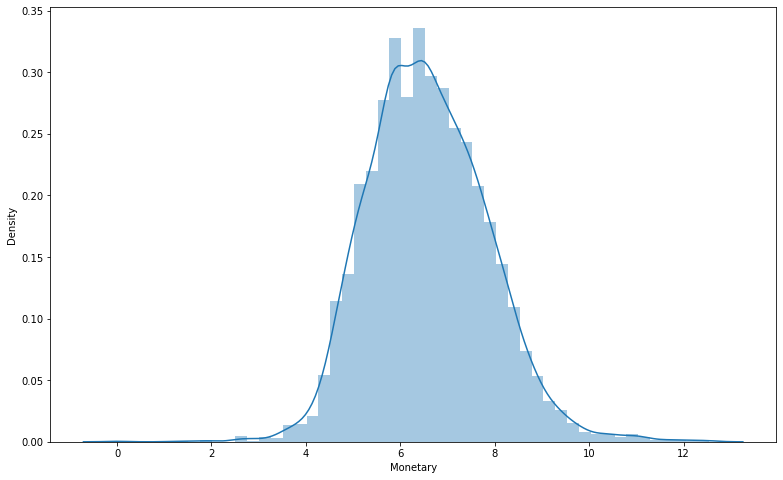

In [160]:

#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [162]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

#**K-Means Clustering**

In [163]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42043960957985754
For n_clusters = 3, silhouette score is 0.3426264907032349
For n_clusters = 4, silhouette score is 0.36471463504091317
For n_clusters = 5, silhouette score is 0.3351563618973208
For n_clusters = 6, silhouette score is 0.3440674479238548
For n_clusters = 7, silhouette score is 0.3472357017856801
For n_clusters = 8, silhouette score is 0.3380711258543554
For n_clusters = 9, silhouette score is 0.34532436650689974
For n_clusters = 10, silhouette score is 0.34794474523684116
For n_clusters = 11, silhouette score is 0.3373106799145017
For n_clusters = 12, silhouette score is 0.34333292732399323
For n_clusters = 13, silhouette score is 0.339160666996657
For n_clusters = 14, silhouette score is 0.3406435300874304
For n_clusters = 15, silhouette score is 0.3374423431380648


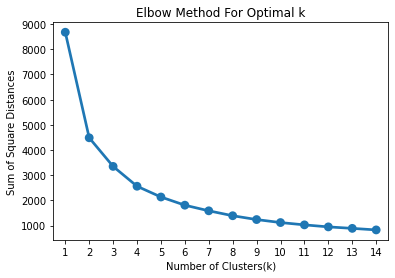

In [164]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [166]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

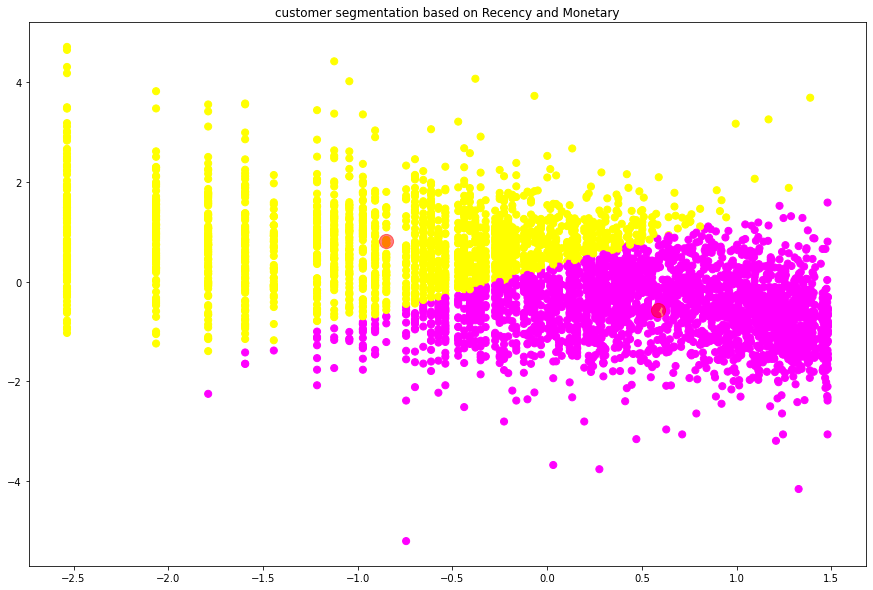

In [167]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)